# 그리디 : 현재 상황에서 지금 당장 좋은 것만 고르는 방법

## 그리디 알고리즘 유형 -> 창의력, 문제를 풀기 위한 최소한의 아이디어

### 기준에 따라 가장 좋은 것을 선택하는 알고리즘 -> ex) '가장 큰 순서대로' , '가장 작은 순서대로' 같은 기준

### ex 3-1 : 거스름돈 

### 당신은 음식점의 계산을 도와주는 점원이다. 카운터에는 거스름돈으로 사용할 500원 , 100원, 50원, 10원짜리 동전이 무한히 존재한다고 가정한다. 손님에게 거슬러 줘야 할 돈이 N원일 때 거슬러줘야 할 동전의 최소 개수를 구하라. 단, 거슬러 줘야 할 돈 N은 항상 10의 배수이다.

In [ ]:
# '가장 큰 화폐의 단위부터 거슬러 주는 것'

n = 1470
count = 0

# 큰 단위부터 차례대로 확인
list = [500,100,50,10]

for coin in list:
    count += n //coin # 몫
    n %= coin # 나머지

print(count)

In [ ]:
# 대부분의 그리드 알고리즘 문제
# 1. 문제 풀이를 위한 최소한의 아이디어 떠올리기
# 2. 이 아이디어가 정당한지 검토
# ex 동전문제 : 동전의 큰 단위가 항상 작은 단위의 배수 -> 작은 단위의 동전들을 종합해 다른 해가 나올 수 없음

## 문제 1 
### 큰 수의 법칙 (난이도 하)

#### '큰 수의 법칙'은 일반적으로 통계 분야에서 다루어지는 내용이지만 동빈이는 본인만의 방식으로 다르게 사용하고 있다. 동빈이의 큰 수의 법칙은 다양한 수로 이루어진 배열이 있을 때 주어진 수들을 M번 더하야 가장 큰 수를 만드는 법칙이다. 단, 배열의 특정한 인덱스(번호)에 해당하는 수가 연속해서 K번을 초과하여 더해질 수 없는 것이 이 법칙의 특징이다. 예를 들어 순서대로 2, 4, 5, 4, 6으로 이루어진 배열이 있을 때 M이 8이고, K가 3이라고 가정하자. 이 경우 특정한 인덱스의 수가 연속해서 세 번까지만 더해질 수 있으므로 큰 수의 법칙에 따른 결과는 6+6+6+5+6+6+6+5 인 46이 된다. 단, 서로 다른 인덱스에 해당하는 수가 같은 경우에도 서로 다른 것으로 간주한다. 예를 들어 순서대로 3, 4, 3, 4, 3으로 이루어진 배열이 있을 때 M이 7이고, K가 2라고 가정하자. 이 경우 두 번째 원소에 해당하는 4와 네 번째 원소에 해당하는 4를 번갈아 두 번씩 더하는 것이 가능하다. 결과적으로 4+4+4+4+4+4+4 인 28이 도출된다.
#### 배열의 크기 N, 숫자가 더해지는 횟수 M, r그리고 K가 주어질 때 동빈이의 큰 수의 법칙에 따른 결과를 출력하시오.

#### 입력 조건
첫째 줄에 N(2 <= N <= 1,000),  M(1<= M<= 10,000),  K(1<= K<= 10,000)의 자연수가 주어지며, 각 자연수는 공백으로 구분한다. <br>
둘째 줄에 N개의 자연수가 주어진다. 각 자연수는 공백으로 구분한다. 단, 각각의 자연수는 1 이상 10,000이하의 수로 주어진다. <br>
입력으로 주어지는 K는 항상 M보다 작거나 같다. <br>

#### 출력 조건
##### 첫째 줄에 동빈이의 큰 수의 법칙에 따라 더해진 답을 출력한다. 

#### 입력 예시
5 8 3 <br> 
2 4 5 4 6 <br>

In [79]:
# 가장 큰 수와 두번째로 큰 수를 뽑아내고, 가장 큰수를 K번, 두번째 큰수를 1번, 이렇게 총 m번 더해준다. 
n, m, k=map(int, input().split())

data = [int(x) for x in input().split()]

data.sort(reverse=True)

first=data[0]
second = data[1]
result = 0

while True:
    for i in range(k):
        if m ==0:
            break
        result += first
        m -= 1
    if m ==0 :
        break
    result += second
    m -= 1

print(result)

5 8 3
2 4 5 4 6
46


In [80]:
# 점화식 이용
n, m, k=map(int, input().split())
data = [int(x) for x in input().split()]

data.sort(reverse=True)
first=data[0]
second = data[1]

# 가장 큰 수가 더해지는 횟수 계산

count = int(m /(k+1)) *k
count += m % (k+1)

result = 0
result += (count) *first
result += (m-count) *second

print(result)

5 8 3
2 4 5 4 6
46


## 문제 2 숫자 카드 게임

### 숫자 카드 게임은 여러 개의 숫자 카드 중에서 가장 높은 숫자가 쓰인 카드 한 장을 뽑는 게임이다. 단, 게임의 룰을 지키며 카드를 뽑아야 하고 룰은 다음과 같다. 

1. 숫자가 쓰인 카드들이 N x M 형태로 놓여 있다. 이때 N은 행의 개수를 의미하며, M은 열의 개수를 의미한다. <br>
2. 먼저 뽑고자 하는 카드가 포함되어 있는 행을 선택한다. <br>
3. 그다음 선택된 행에 포함된 카드들 중 가장 숫자가 낮은 카드를 뽑아야 한다. <br>
4. 따라서 처음에 카드를 골라낼 행을 선택할 때, 이후에 해당 행에서 가장 숫자가 낮은 카드를 뽑을 것을 고려하여 최종적으로 가장 높은 숫자의 카드를 뽑을 수 있도록 전략을 세워햐 한다. <br>
#### 입력조건
첫째 줄에 숫자 카드들이 놓인 행의 개수N , 열의 개수 M <br>
둘째 줄부터 N개의 줄에 걸쳐 각 카드에 적힌 숫자가 주어진다. <br>
#### 출력조건 
첫째 줄에 게임의 룰에 맞게 선택한 카드에 적힌 숫자를 출력 <br>

입력예시 <br>
3 3 <br>
3 1 2 <br>
4 1 4 <br>
2 2 2 <br>
출력예시 <br>
2

In [1]:
# 풀이 1
n, m = map(int, input().split())
result = 0

for i in range(n):
    data = list(map(int, input().split()))
    min_value = min(data)
    result = max(result, min_value)
print(result)

3 3
3 1 2
4 1 4
2 2 2
2


In [ ]:
## 풀이 2
n, m = map(int, input().split())
result = 0

for i in range(n):
    data = list(map(int, input().split()))
    min_value = 10001
    for a in data:
        min_value = min(min_value, a)
    result = max(result, min_value)

print(result)

## 문제 3 1이 될 때 까지
### 어떠한 수 N이 1이 될 때까지 다음의 두 과정 중 하나를 반복적으로 선택하여 수행하려고 한다. 단, 두 번째 연산은 N이 K로 나누어떨어질 때만 선택할 수 있다. 

1. N에서 1을 뺀다. <br>
2. N을 K로 나눈다. <br>

### 예를 들어 N이 17, K가 4라고 가정하자. 이때 1번의 과정을 한 번 수행하면 N은 16이 된다. 이후에 2번의 과정을 두 번 수행하면 N은 1이 된다. 결과적으로 이 경우 전체 과정을 실행한 횟수는 3이된다. 이는 N을 1로 만드는 최소 횟수이다. N과 K가 주어질 때 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 최소 횟수를 구하시오. 

입력 조건 <br>
첫째 줄에 N과 K가 공백으로 구분되며 각각 자연수로 주어진다. 이때 입력으로 주어지는 N은 항상 K보다 크거나 같다. <br>
출력 조건 <br>
첫째 줄에 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 횟수의 최솟값을 출력 <br>

입력 예시 <br>
25 5 <br>
출력 예시<br> 
2


In [15]:
# 1을 빼는것 보다 K로 나누는 것이 숫자를 많이 줄일 수 있다.  -> N이 K의 배수가 될 때까지 1씩 빼기, 그다음 N 을 K로 나누기

# 풀이 1
n, k = map(int, input().split())
result = 0

while n >= k:
    
    while n %k !=0:
        n -= 1
        result +=1
        
    n //=k
    result +=1
    
while n>1:
    n-=1
    result += 1

print(result)

25 5
2


In [17]:
# 풀이 2
n, k = map(int, input().split())
result = 0

while True:
    target = (n//k) *k
    result += (n-target)
    n= target
    
    if n < k:
        break
    
    result += 1
    n//= k
    
result += (n-1)
print(result)
    

25 5
2


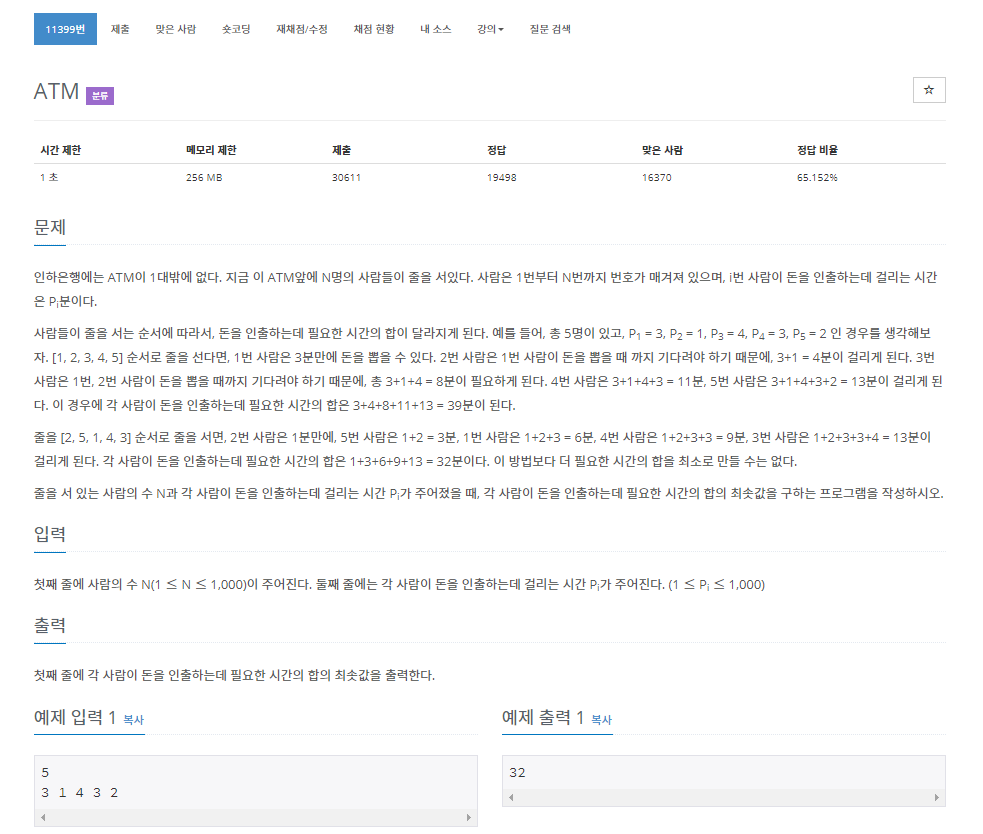

In [ ]:
# pi 가 가장 작은 사람이 제일 앞으로 오게 하면 최소값!

In [72]:
num = int(input())
P = list(map(int, input().split()))
p=sorted(P)

t= [0]*num

t[0] = p[0]

if num ==1 :
    pass
else:
    for i in range(1,num):
        t[i] = t[i-1] + p[i]

print(sum(t))

5
3 1 4 3 2
32
